In [6]:
from seaborn import load_dataset
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np


In [7]:
test_data=pd.read_csv('SalaryData_Test(1).csv')

In [8]:
test_data=test_data.head(60)
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
9,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [9]:
test_data.shape

(60, 14)

In [10]:
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
9,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [11]:
test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,36.050000,9.700000,1276.583333,28.683333,41.250000
std,13.029855,2.553164,3215.249477,222.180145,12.149667
min,17.000000,3.000000,0.000000,0.000000,10.000000
25%,25.000000,9.000000,0.000000,0.000000,38.750000
50%,34.000000,9.000000,0.000000,0.000000,40.000000
75%,44.000000,11.000000,0.000000,0.000000,50.000000
max,65.000000,15.000000,15024.000000,1721.000000,90.000000


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            60 non-null     int64 
 1   workclass      60 non-null     object
 2   education      60 non-null     object
 3   educationno    60 non-null     int64 
 4   maritalstatus  60 non-null     object
 5   occupation     60 non-null     object
 6   relationship   60 non-null     object
 7   race           60 non-null     object
 8   sex            60 non-null     object
 9   capitalgain    60 non-null     int64 
 10  capitalloss    60 non-null     int64 
 11  hoursperweek   60 non-null     int64 
 12  native         60 non-null     object
 13  Salary         60 non-null     object
dtypes: int64(5), object(9)
memory usage: 6.7+ KB


In [13]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [14]:
test_data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

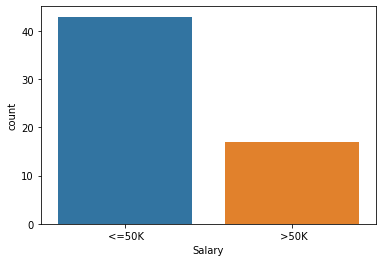

In [19]:
sns.countplot(x='Salary',data= test_data)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()


Text(0.5, 1.0, 'pair plots to understand correlation')

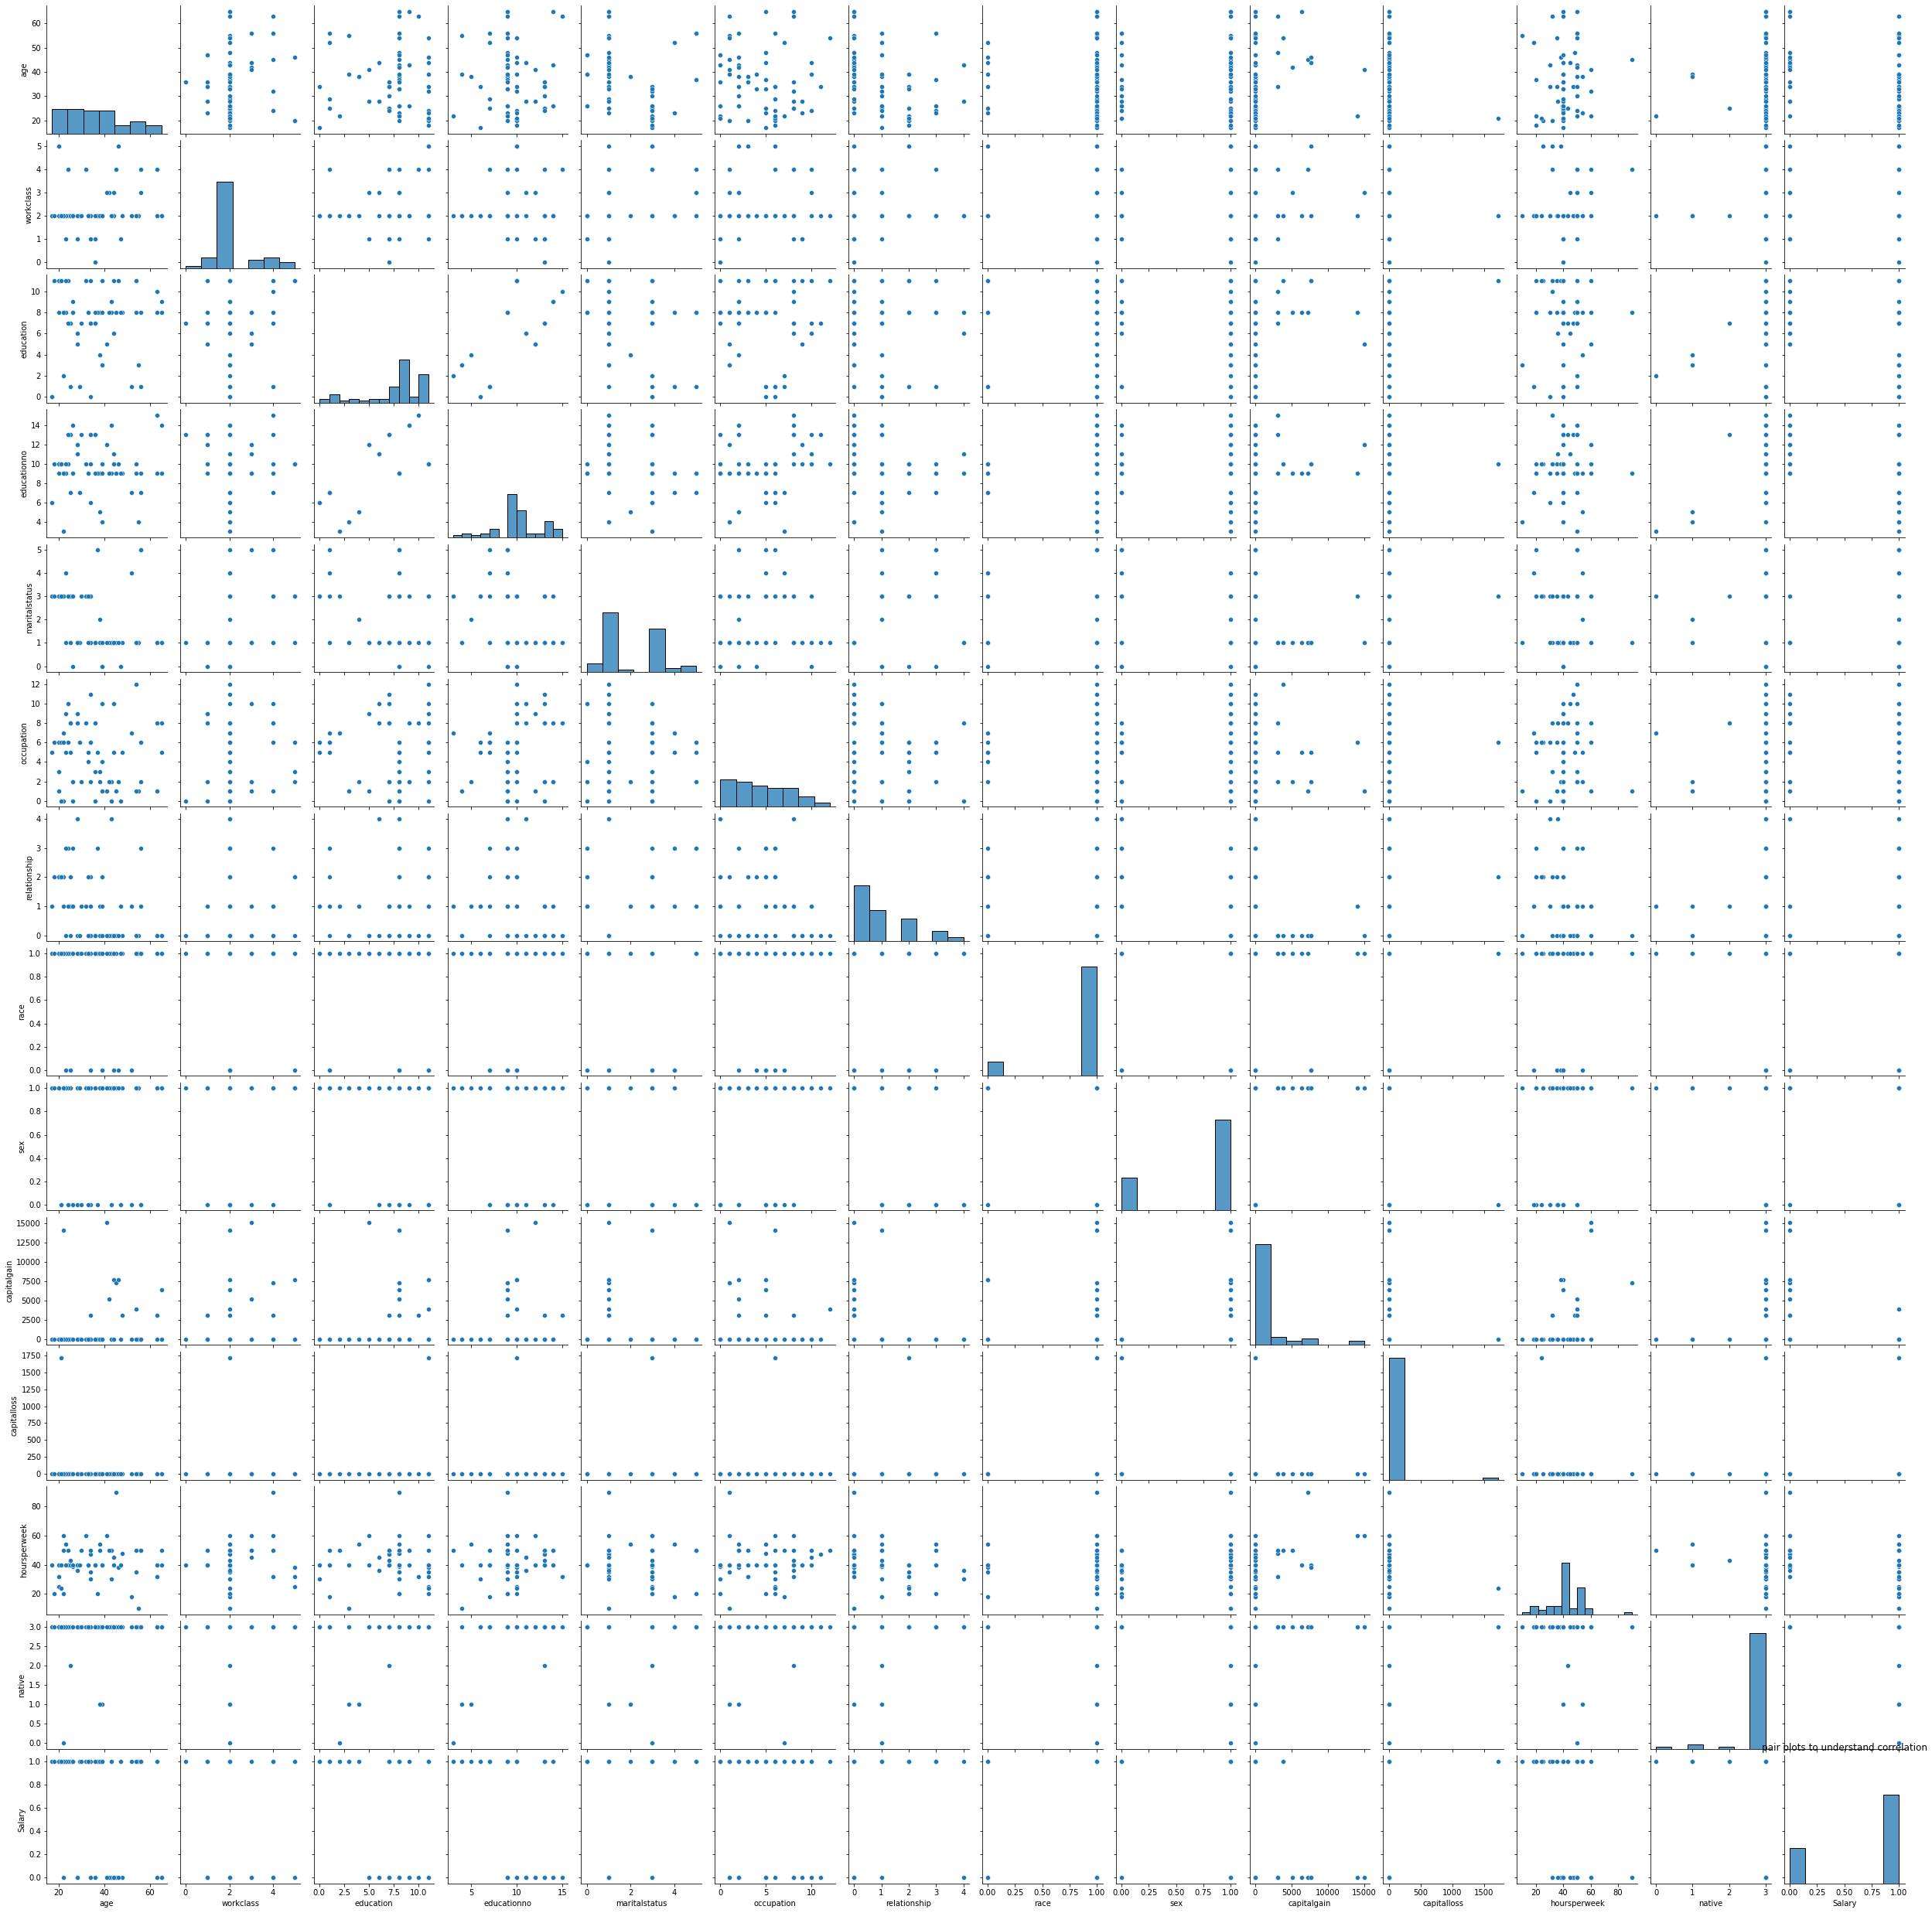

In [86]:
sns.pairplot(test_data)
plt.title('pair plots to understand correlation')

In [16]:
train_data=pd.read_csv('SalaryData_Train(1).csv')
train_data=train_data.head(60)
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [20]:
train_data.shape

(60, 14)

In [21]:
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,38.366667,10.400000,480.933333,89.200000,42.166667
std,10.974495,2.900614,2045.843333,396.861279,11.730254
min,19.000000,3.000000,0.000000,0.000000,13.000000
25%,30.000000,9.000000,0.000000,0.000000,40.000000
50%,39.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,59.000000,16.000000,14084.000000,2042.000000,80.000000


In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            60 non-null     int64 
 1   workclass      60 non-null     object
 2   education      60 non-null     object
 3   educationno    60 non-null     int64 
 4   maritalstatus  60 non-null     object
 5   occupation     60 non-null     object
 6   relationship   60 non-null     object
 7   race           60 non-null     object
 8   sex            60 non-null     object
 9   capitalgain    60 non-null     int64 
 10  capitalloss    60 non-null     int64 
 11  hoursperweek   60 non-null     int64 
 12  native         60 non-null     object
 13  Salary         60 non-null     object
dtypes: int64(5), object(9)
memory usage: 6.7+ KB


In [23]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [24]:
train_data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [25]:
test_data['maritalstatus'].value_counts()

 Married-civ-spouse       29
 Never-married            21
 Divorced                  4
 Widowed                   3
 Separated                 2
 Married-spouse-absent     1
Name: maritalstatus, dtype: int64

In [26]:
train_data[train_data.duplicated()].shape

(0, 14)

In [27]:
train_data[train_data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [28]:
train_data =train_data.drop_duplicates()
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [29]:
train_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [30]:
test_data[test_data.duplicated()].shape

(0, 14)

In [31]:
test_data[test_data.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [32]:
test_data=test_data.drop_duplicates()
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
9,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [33]:
test_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [34]:
test_data['Salary'].value_counts()

 <=50K    43
 >50K     17
Name: Salary, dtype: int64

In [35]:
train_data['Salary'].value_counts()

 <=50K    47
 >50K     13
Name: Salary, dtype: int64

In [36]:
pd.crosstab(train_data['occupation'],train_data['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,6,0
Craft-repair,3,0
Exec-managerial,7,5
Farming-fishing,2,0
Handlers-cleaners,3,0
Machine-op-inspct,7,0
Other-service,4,0
Prof-specialty,4,6
Protective-serv,1,0


In [37]:
pd.crosstab(train_data['workclass'],train_data['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,2,2
Local-gov,1,1
Private,36,7
Self-emp-inc,1,0
Self-emp-not-inc,4,2
State-gov,3,1


In [38]:
pd.crosstab(train_data['workclass'],train_data['occupation'])

occupation,Adm-clerical,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,
Federal-gov,1,0,1,1,0,0,0,1,0,0,0,0
Local-gov,0,0,0,0,0,0,0,0,1,0,1,0
Private,4,2,7,0,3,7,3,6,0,4,4,3
Self-emp-inc,0,0,1,0,0,0,0,0,0,0,0,0
Self-emp-not-inc,0,0,3,1,0,0,0,2,0,0,0,0
State-gov,1,1,0,0,0,0,1,1,0,0,0,0


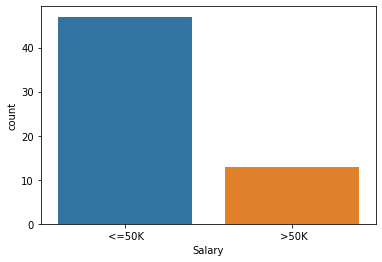

 <=50K    47
 >50K     13
Name: Salary, dtype: int64

In [39]:
sns.countplot(x='Salary',data= train_data)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
train_data['Salary'].value_counts()

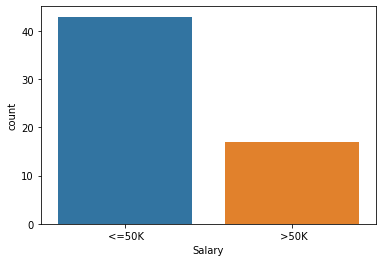

 <=50K    43
 >50K     17
Name: Salary, dtype: int64

In [40]:
sns.countplot(x='Salary',data= test_data)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
test_data['Salary'].value_counts()

<AxesSubplot:xlabel='education'>

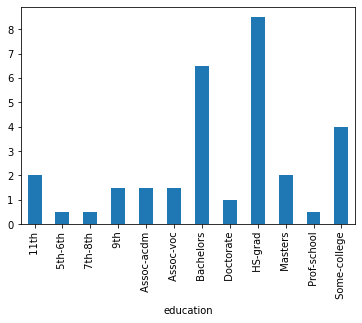

In [41]:
pd.crosstab(train_data['Salary'],train_data['education']).mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

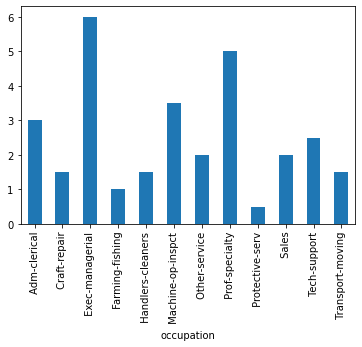

In [42]:
pd.crosstab(train_data['Salary'],train_data['occupation']).mean().plot(kind='bar')

<AxesSubplot:xlabel='workclass'>

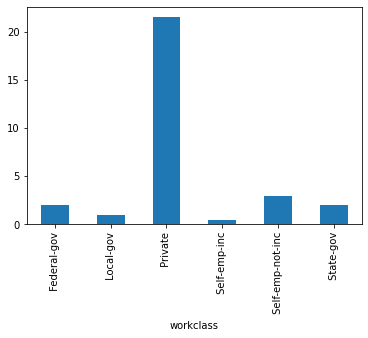

In [43]:
pd.crosstab(train_data['Salary'],train_data['workclass']).mean().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

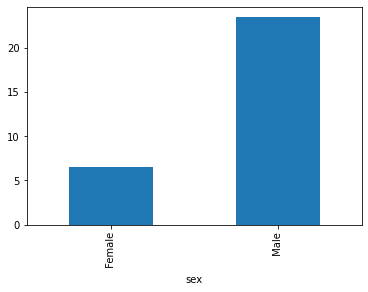

In [44]:
pd.crosstab(train_data['Salary'],train_data['sex']).mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship'>

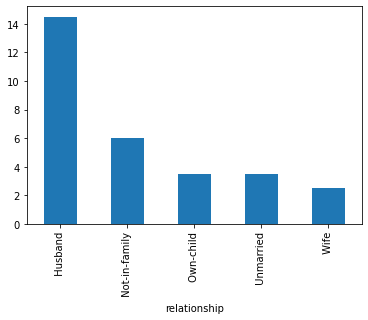

In [45]:
pd.crosstab(train_data['Salary'],train_data['relationship']).mean().plot(kind='bar')

Text(0.5, 1.0, 'pair plots to understand correlation')

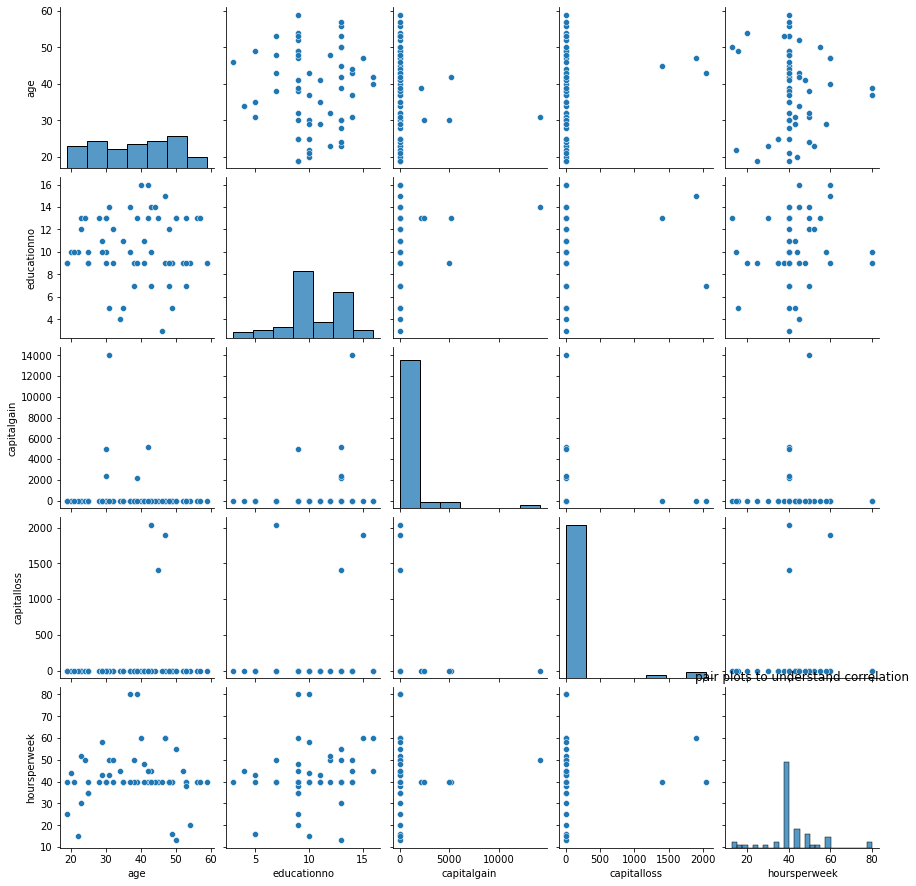

In [46]:
sns.pairplot(train_data)
plt.title('pair plots to understand correlation')

In [47]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]
for i in string_columns:
        train_data[i]= number.fit_transform(train_data[i])
        test_data[i]=number.fit_transform(test_data[i])

In [48]:
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,6,13,4,0,1,4,1,2174,0,40,6,<=50K
1,50,4,6,13,2,2,0,4,1,0,0,13,6,<=50K
2,38,2,8,9,0,4,1,4,1,0,0,40,6,<=50K
3,53,2,0,7,2,4,0,2,1,0,0,40,6,<=50K
4,28,2,6,13,2,7,4,2,0,0,0,40,0,<=50K
5,37,2,9,14,2,2,4,4,0,0,0,40,6,<=50K
6,49,2,3,5,3,6,1,2,0,0,0,16,3,<=50K
7,52,4,8,9,2,2,0,4,1,0,0,45,6,>50K
8,31,2,9,14,4,7,1,4,0,14084,0,50,6,>50K
9,42,2,6,13,2,2,0,4,1,5178,0,40,6,>50K


In [49]:
train_data['Salary']

0      <=50K
1      <=50K
2      <=50K
3      <=50K
4      <=50K
5      <=50K
6      <=50K
7       >50K
8       >50K
9       >50K
10      >50K
11      >50K
12     <=50K
13     <=50K
14     <=50K
15     <=50K
16     <=50K
17     <=50K
18      >50K
19      >50K
20     <=50K
21     <=50K
22     <=50K
23     <=50K
24      >50K
25     <=50K
26     <=50K
27     <=50K
28     <=50K
29     <=50K
30     <=50K
31     <=50K
32     <=50K
33     <=50K
34     <=50K
35     <=50K
36     <=50K
37     <=50K
38     <=50K
39     <=50K
40     <=50K
41     <=50K
42      >50K
43     <=50K
44     <=50K
45     <=50K
46     <=50K
47     <=50K
48      >50K
49      >50K
50     <=50K
51      >50K
52     <=50K
53     <=50K
54     <=50K
55     <=50K
56     <=50K
57     <=50K
58      >50K
59     <=50K
Name: Salary, dtype: object

In [50]:
#train_data['Salary']=np.where(train_data['Salary']=='<=50K',0,1)
train_data['Salary']=train_data['Salary'].astype('string')
#train_data['Salary']=np.where(train_data['Salary']=='<=50K',0,1)
#train_data['Salary']
train_data['Salary']

0      <=50K
1      <=50K
2      <=50K
3      <=50K
4      <=50K
5      <=50K
6      <=50K
7       >50K
8       >50K
9       >50K
10      >50K
11      >50K
12     <=50K
13     <=50K
14     <=50K
15     <=50K
16     <=50K
17     <=50K
18      >50K
19      >50K
20     <=50K
21     <=50K
22     <=50K
23     <=50K
24      >50K
25     <=50K
26     <=50K
27     <=50K
28     <=50K
29     <=50K
30     <=50K
31     <=50K
32     <=50K
33     <=50K
34     <=50K
35     <=50K
36     <=50K
37     <=50K
38     <=50K
39     <=50K
40     <=50K
41     <=50K
42      >50K
43     <=50K
44     <=50K
45     <=50K
46     <=50K
47     <=50K
48      >50K
49      >50K
50     <=50K
51      >50K
52     <=50K
53     <=50K
54     <=50K
55     <=50K
56     <=50K
57     <=50K
58      >50K
59     <=50K
Name: Salary, dtype: string

In [51]:
train_data['Salary']=np.where(train_data['Salary'].str.contains('<=50K'),1,0)
train_data['Salary']

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    1
16    1
17    1
18    0
19    0
20    1
21    1
22    1
23    1
24    0
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    0
43    1
44    1
45    1
46    1
47    1
48    0
49    0
50    1
51    0
52    1
53    1
54    1
55    1
56    1
57    1
58    0
59    1
Name: Salary, dtype: int32

In [52]:
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,3,5,2,0,1,0,0,40,3,<=50K
1,38,2,8,9,1,3,0,1,1,0,0,50,3,<=50K
2,28,1,5,12,1,9,0,1,1,0,0,40,3,>50K
3,44,2,11,10,1,5,0,0,1,7688,0,40,3,>50K
4,34,2,0,6,3,6,1,1,1,0,0,30,3,<=50K
5,63,4,10,15,1,8,0,1,1,3103,0,32,3,>50K
6,24,2,11,10,3,6,3,1,0,0,0,40,3,<=50K
7,55,2,3,4,1,1,0,1,1,0,0,10,3,<=50K
8,65,2,8,9,1,5,0,1,1,6418,0,40,3,>50K
9,36,0,7,13,1,0,0,1,1,0,0,40,3,<=50K


In [53]:
test_data['Salary']=test_data['Salary'].astype('string')
test_data['Salary']

0      <=50K
1      <=50K
2       >50K
3       >50K
4      <=50K
5       >50K
6      <=50K
7      <=50K
8       >50K
9      <=50K
10     <=50K
11      >50K
12      >50K
13     <=50K
14     <=50K
15     <=50K
16      >50K
17     <=50K
18     <=50K
19     <=50K
20      >50K
21     <=50K
22     <=50K
23     <=50K
24     <=50K
25      >50K
26     <=50K
27     <=50K
28     <=50K
29     <=50K
30      >50K
31     <=50K
32     <=50K
33     <=50K
34      >50K
35      >50K
36     <=50K
37     <=50K
38     <=50K
39      >50K
40     <=50K
41     <=50K
42     <=50K
43     <=50K
44     <=50K
45     <=50K
46     <=50K
47      >50K
48     <=50K
49     <=50K
50     <=50K
51      >50K
52      >50K
53     <=50K
54     <=50K
55     <=50K
56     <=50K
57     <=50K
58     <=50K
59      >50K
Name: Salary, dtype: string

In [54]:
test_data['Salary']=np.where(test_data['Salary'].str.contains('<=50K'),1,0)
test_data['Salary']

0     1
1     1
2     0
3     0
4     1
5     0
6     1
7     1
8     0
9     1
10    1
11    0
12    0
13    1
14    1
15    1
16    0
17    1
18    1
19    1
20    0
21    1
22    1
23    1
24    1
25    0
26    1
27    1
28    1
29    1
30    0
31    1
32    1
33    1
34    0
35    0
36    1
37    1
38    1
39    0
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    0
48    1
49    1
50    1
51    0
52    0
53    1
54    1
55    1
56    1
57    1
58    1
59    0
Name: Salary, dtype: int32

In [55]:
#for train data
x=train_data.drop(['Salary'],axis=1)
y= train_data['Salary']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25, random_state=0)

In [56]:
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,6,13,4,0,1,4,1,2174,0,40,6
1,50,4,6,13,2,2,0,4,1,0,0,13,6
2,38,2,8,9,0,4,1,4,1,0,0,40,6
3,53,2,0,7,2,4,0,2,1,0,0,40,6
4,28,2,6,13,2,7,4,2,0,0,0,40,0
5,37,2,9,14,2,2,4,4,0,0,0,40,6
6,49,2,3,5,3,6,1,2,0,0,0,16,3
7,52,4,8,9,2,2,0,4,1,0,0,45,6
8,31,2,9,14,4,7,1,4,0,14084,0,50,6
9,42,2,6,13,2,2,0,4,1,5178,0,40,6


In [57]:
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    1
16    1
17    1
18    0
19    0
20    1
21    1
22    1
23    1
24    0
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    0
43    1
44    1
45    1
46    1
47    1
48    0
49    0
50    1
51    0
52    1
53    1
54    1
55    1
56    1
57    1
58    0
59    1
Name: Salary, dtype: int32

In [58]:

x_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
26,39,2,8,9,0,2,1,4,1,0,0,80,6
35,19,2,8,9,1,0,4,4,0,0,0,25,6
59,29,2,11,10,0,10,1,4,1,0,0,58,6
28,23,1,4,12,4,8,1,4,1,0,0,52,6
11,30,5,6,13,2,7,0,1,1,0,0,40,2
2,38,2,8,9,0,4,1,4,1,0,0,40,6
34,21,2,11,10,4,5,2,4,1,0,0,40,6
58,42,2,7,16,2,7,0,4,1,0,0,45,6
40,49,2,8,9,5,0,3,4,0,0,0,40,6
22,43,2,0,7,2,11,0,4,1,0,2042,40,6


In [59]:
x_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
43,53,2,8,9,2,5,0,4,1,0,0,38,6
49,50,0,6,13,0,2,1,4,1,0,0,55,6
7,52,4,8,9,2,2,0,4,1,0,0,45,6
14,34,2,2,4,2,11,0,0,1,0,0,45,4
32,22,5,11,10,2,6,0,2,1,0,0,15,6
50,47,3,8,9,0,2,1,4,1,0,0,60,6
29,20,2,11,10,4,9,2,2,1,0,0,44,6
42,57,0,6,13,2,7,0,2,1,0,0,40,6
54,41,2,8,9,2,0,0,4,1,0,0,48,6
18,43,4,9,14,0,2,3,4,0,0,0,45,6


In [60]:
#for test data
x_1=test_data.drop(['Salary'],axis=1)
y_1= test_data['Salary']
x_1_train,x_1_test,y_1_train,y_1_test=train_test_split(x_1,y_1, test_size=0.25, random_state=0)

In [61]:
x_1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,3,5,2,0,1,0,0,40,3
1,38,2,8,9,1,3,0,1,1,0,0,50,3
2,28,1,5,12,1,9,0,1,1,0,0,40,3
3,44,2,11,10,1,5,0,0,1,7688,0,40,3
4,34,2,0,6,3,6,1,1,1,0,0,30,3
5,63,4,10,15,1,8,0,1,1,3103,0,32,3
6,24,2,11,10,3,6,3,1,0,0,0,40,3
7,55,2,3,4,1,1,0,1,1,0,0,10,3
8,65,2,8,9,1,5,0,1,1,6418,0,40,3
9,36,0,7,13,1,0,0,1,1,0,0,40,3


In [62]:
y_1

0     1
1     1
2     0
3     0
4     1
5     0
6     1
7     1
8     0
9     1
10    1
11    0
12    0
13    1
14    1
15    1
16    0
17    1
18    1
19    1
20    0
21    1
22    1
23    1
24    1
25    0
26    1
27    1
28    1
29    1
30    0
31    1
32    1
33    1
34    0
35    0
36    1
37    1
38    1
39    0
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    0
48    1
49    1
50    1
51    0
52    0
53    1
54    1
55    1
56    1
57    1
58    1
59    0
Name: Salary, dtype: int32

In [ ]:
#y_1['Salary']=np.where(y_1['Salary']=='<=50K',0,1)


In [63]:
x_train.shape

(45, 13)

In [64]:
x_test.shape

(15, 13)

In [65]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)
x_1_train=sc_x.fit_transform(x_1_train)
x_1_test=sc_x.fit_transform(x_1_test)

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

using kernel as linear type

In [67]:
#for train data
model_linear=SVC(kernel='linear')
model_linear.fit(x_train,y_train)
y_pred_train=model_linear.predict(x_test)

In [68]:
accuracy_score(y_test,y_pred_train)


0.9333333333333333

In [69]:
confusion_matrix(y_test,y_pred_train)

array([[ 2,  1],
       [ 0, 12]], dtype=int64)

C:\Users\shiji\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


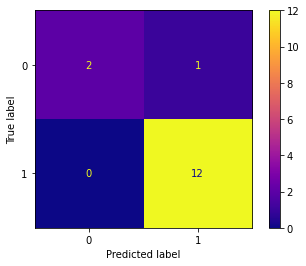

In [70]:
plot_confusion_matrix(model_linear,x_test,y_test,cmap="plasma")
import warnings
warnings.filterwarnings('ignore')

In [71]:
model_linear=SVC(kernel='linear')
model_linear.fit(x_1_train,y_1_train)
y_pred_test=model_linear.predict(x_1_test)

In [72]:
accuracy_score(y_1_test,y_pred_test)

0.6666666666666666

In [73]:
confusion_matrix(y_1_test,y_pred_test)

array([[2, 4],
       [1, 8]], dtype=int64)

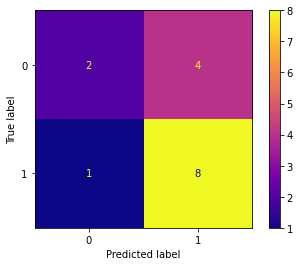

In [74]:
plot_confusion_matrix(model_linear,x_1_test,y_1_test,cmap="plasma")
import warnings
warnings.filterwarnings('ignore')

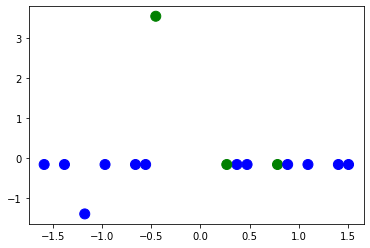

In [75]:
from matplotlib.colors import ListedColormap
zero_one_clrmap=ListedColormap(('green','blue'))
plt.scatter(x_test[:,0],x_test[:,1], c=y_test, s=100, cmap=zero_one_clrmap)


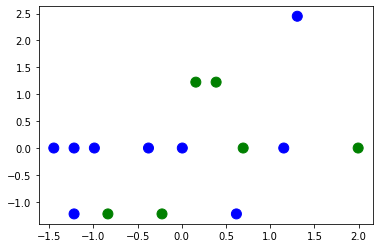

In [76]:
from matplotlib.colors import ListedColormap
zero_one_clrmap=ListedColormap(('green','blue'))
plt.scatter(x_1_test[:,0],x_1_test[:,1], c=y_1_test, s=100, cmap=zero_one_clrmap)


In [77]:
#train data
model_rbf=SVC(kernel='rbf')
model_rbf.fit(x_train,y_train)
y_pred_train=model_rbf.predict(x_test)

In [78]:
accuracy_score(y_test,y_pred_train)

0.8

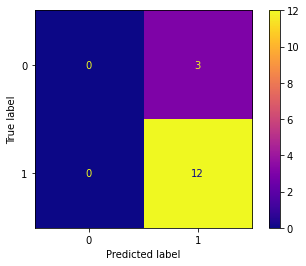

In [79]:
plot_confusion_matrix(model_rbf,x_test,y_test,cmap="plasma")
import warnings
warnings.filterwarnings('ignore')

In [80]:
model_rbf=SVC(kernel='rbf')
model_rbf.fit(x_train,y_train)
y_pred_test=model_rbf.predict(x_test)

In [81]:
accuracy_score(y_test,y_pred_test)

0.8

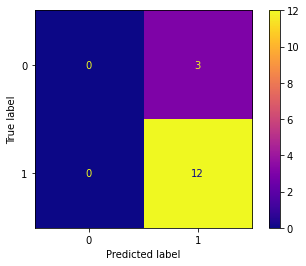

In [82]:
plot_confusion_matrix(model_rbf,x_test,y_test,cmap="plasma")
import warnings
warnings.filterwarnings('ignore')

In [83]:
model_rbf=SVC(kernel='rbf')
model_rbf.fit(x_1_train,y_1_train)
y_1_pred_test=model_rbf.predict(x_1_test)

In [84]:
accuracy_score(y_1_test,y_1_pred_test)

0.6666666666666666

In [85]:

clf = SVC(C= 15, gamma = 0.5)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 80.0


array([[ 0,  3],
       [ 0, 12]], dtype=int64)